In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn import datasets, linear_model, model_selection
%config InlineBackend.figure_format = 'retina'

%matplotlib inline

In [97]:
x = np.array([16, 17, 18, 19, 22, 25, 30, 36, 40, 47]).reshape(-1, 1)  # ages
y = np.array([10, 12, 17, 20, 21, 24, 22, 27, 33, 38])  # cigarettes_per_day

In [98]:
x, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=25, random_state=0)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [121]:
x, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=25, random_state=0)

model = linear_model.LinearRegression()
model.fit(x,y)

y_hat = model.predict(x)
residuals = y - y_hat

r_squared = model.score(x, y)

In [122]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print("R-squared:", r_squared)

Intercept: -2.0354545675768128
Coefficient: 42.97031844469039
R-squared: 0.7244091172944105


The R-squared value calculated by the linear regression model is a measure of how well the independent variable(s) explain the variation in the dependent variable. 
</br>
In this context, the R-squared value is calculated based on the relationship between the actual values of the dependent variable (y) and the predicted values of the dependent variable (y_hat) produced by the model.

The formula for R-squared is:

$[ R^2 = 1 - \frac{{\text{SST}}}{{\text{SSR}}} ]$

In this formula:
- $( R^2 )$ represents the R-squared value.
- SST (Total Sum of Squares) is the sum of the squared differences between the actual values of the dependent variable and its mean.
- SSR (Sum of Squared Residuals) is the sum of the squared differences between the actual values of the dependent variable and the predicted values from the regression model.

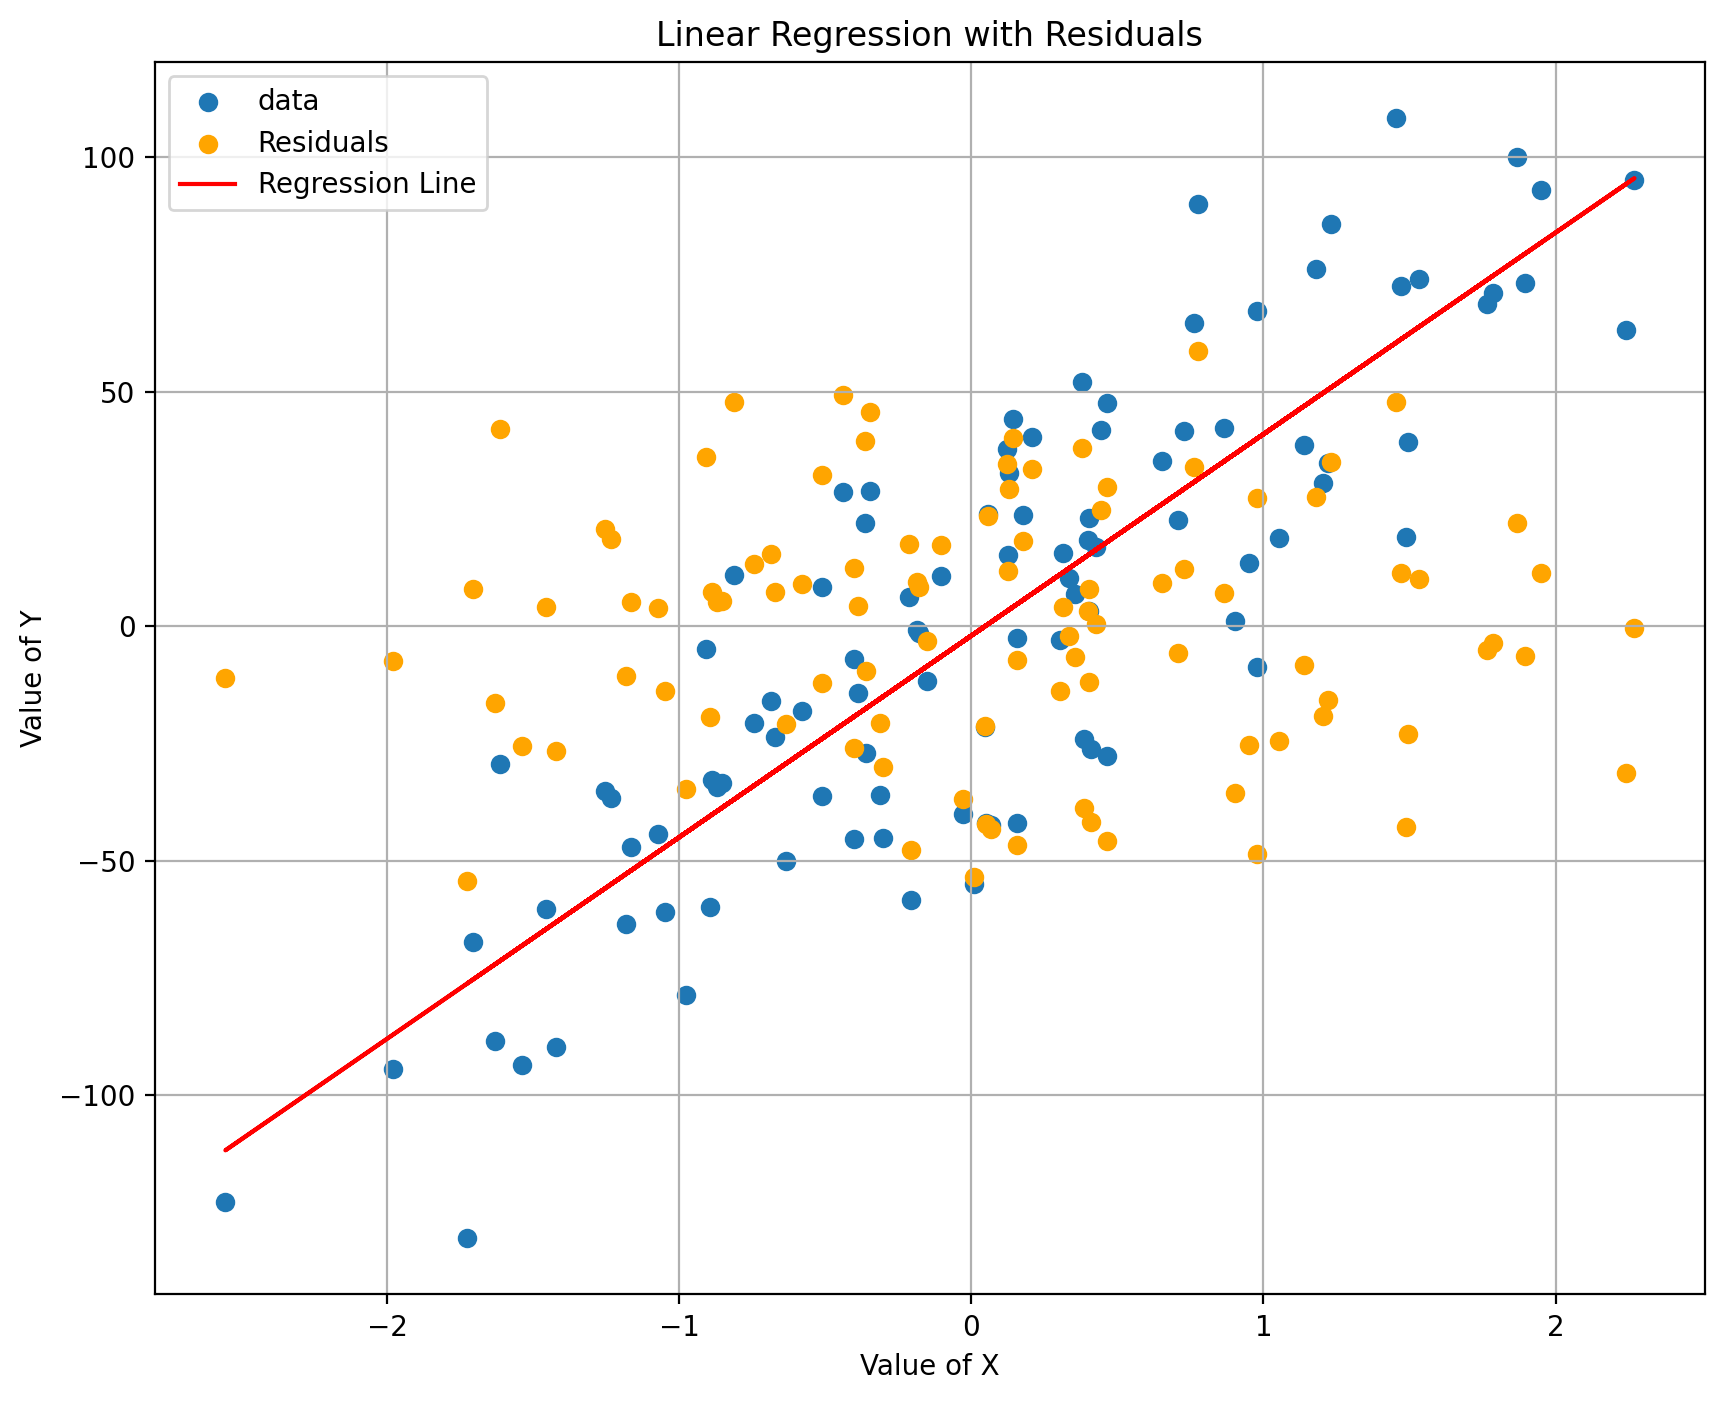

In [137]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, label="data")
ax.scatter(x, residuals, color="orange", label="Residuals")
plt.plot(x, y_hat, color="red", label="Regression Line")
ax.set_title("Linear Regression with Residuals")
ax.set_xlabel("Value of X")
ax.set_ylabel("Value of Y")
ax.grid()
ax.legend()
plt.show()

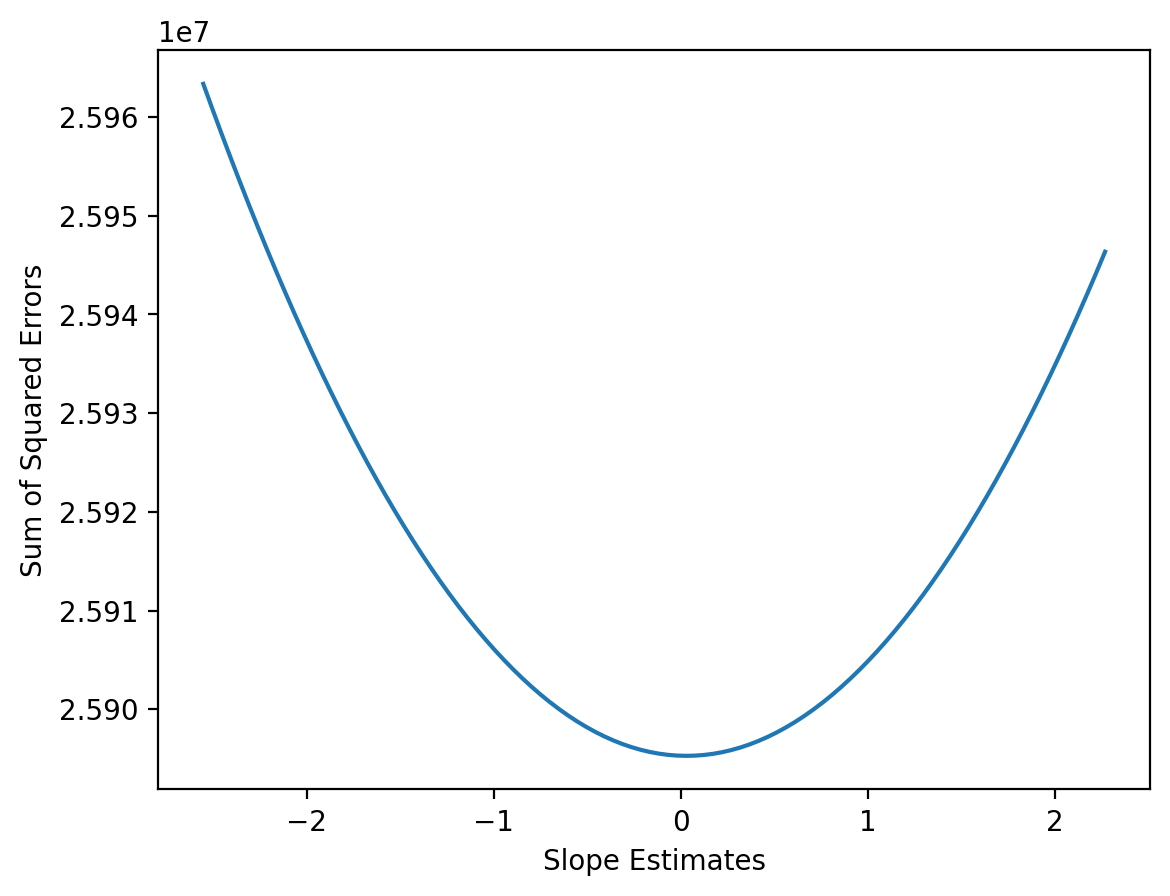

In [145]:
def sse(m, X, y, model):
    """
    Calculate the sum of squared errors (SSE) for a given slope parameter 'm'.

    Parameters:
    m (float): Slope parameter.
    X (array-like): Independent variable values.
    y (array-like): Dependent variable values.
    model: Trained linear regression model object.

    Returns:
    float: Sum of squared errors (SSE).
    """
    # Calculate predicted values using the linear regression model
    y_pred = m * X

    # Calculate residuals
    residuals = y - y_pred

    # Calculate sum of squared errors
    sse = np.sum(residuals**2)

    return sse


# Generate slope estimates
ms = np.linspace(x.min(), x.max(), x.size)

# Calculate SSE for each slope estimate
sses = [sse(m, x, y, model) for m in ms]

# Plot SSE against slope estimates
fig, ax = plt.subplots()
ax.plot(ms, sses)
ax.set_xlabel("Slope Estimates")
ax.set_ylabel("Sum of Squared Errors")
plt.show()

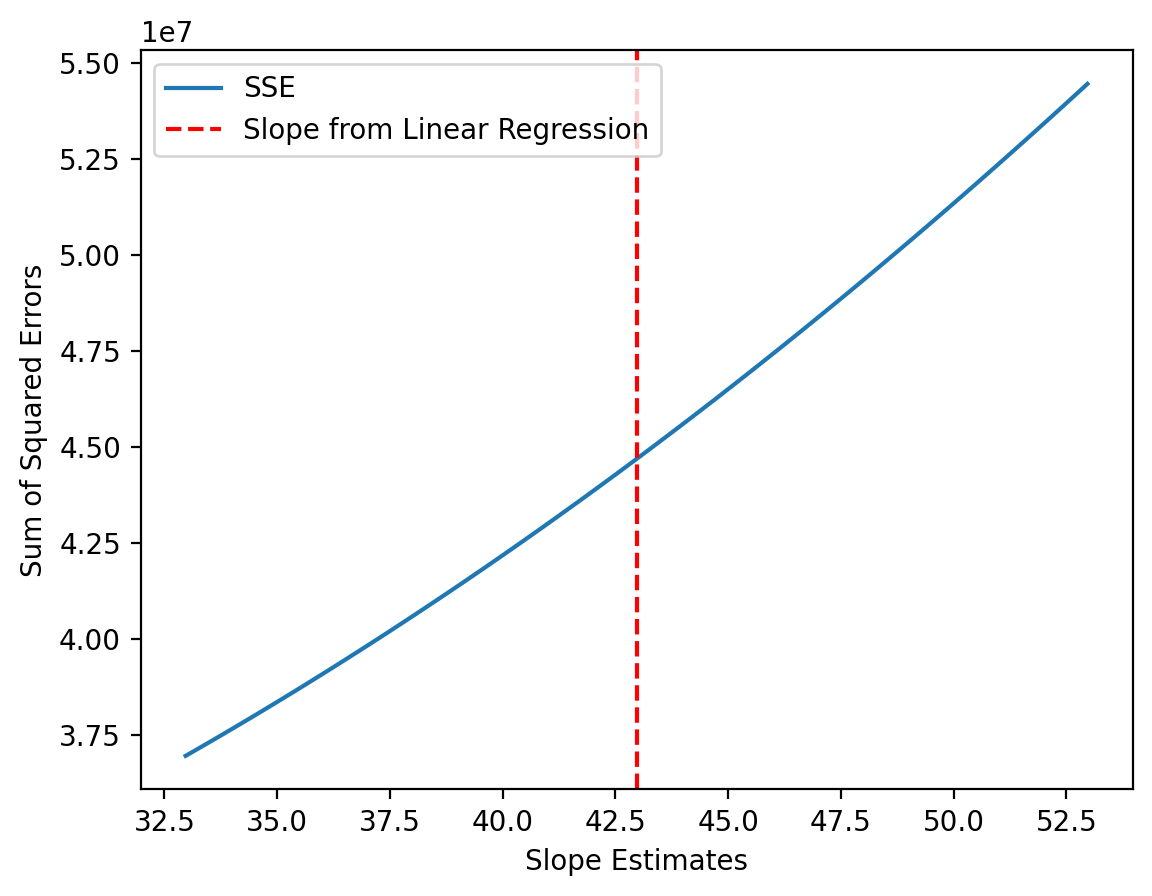

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

# Generate data
x, y = datasets.make_regression(
    n_samples=100, n_features=1, n_informative=1, noise=25, random_state=0
)

# Fit linear regression model
model = linear_model.LinearRegression()
model.fit(x, y)

# Predict y values
y_hat = model.predict(x)

# Calculate residuals
residuals = y - y_hat

# Calculate R-squared
r_squared = model.score(x, y)


# Define function to calculate SSE for a given slope
def sse(m, x, y):
    """
    Calculate the sum of squared errors (SSE) for a given slope parameter 'm'.

    Parameters:
    m (float): Slope parameter.
    x (array-like): Independent variable values.
    y (array-like): Dependent variable values.

    Returns:
    float: Sum of squared errors (SSE).
    """
    # Calculate predicted values using the slope parameter 'm'
    y_pred = m * x

    # Calculate residuals
    residuals = y - y_pred

    # Calculate sum of squared errors
    sse = np.sum(residuals**2)

    return sse


# Generate a range of slope estimates
ms = np.linspace(model.coef_[0] - 10, model.coef_[0] + 10, 100)

# Calculate SSE for each slope estimate
sses = [sse(m, x, y) for m in ms]

# Plot SSE against slope estimates
fig, ax = plt.subplots()
ax.plot(ms, sses, label="SSE")
ax.axvline(
    x=model.coef_[0], color="r", linestyle="--", label="Slope from Linear Regression"
)
ax.set_xlabel("Slope Estimates")
ax.set_ylabel("Sum of Squared Errors")
ax.legend()
plt.show()

In [157]:
model.coef_[0]

42.97031844469039